## Downloading the Libraries that are required: 

We have already installed all the packages that we need to use in this assignment for the previous one except of seaborn. We install it by running the command `pip install seaborn` in cmd

## We import the libraries needed for the assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pip install xlrd

## 1. Exploration of Historical Trends

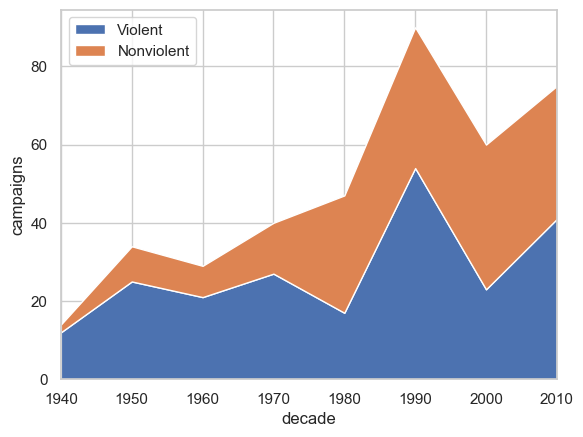

In [2]:
import pandas as pd

# Assuming 'EYEAR' is an index, read the Excel file
df = pd.read_excel('source.xlsx')

df['DECADE'] = (df['EYEAR'] // 10) * 10

df_grouped = df.groupby(['DECADE', 'VIOL']).size().unstack(fill_value=0).reset_index()
df_grouped.columns = ['DECADE','NON VIOLENT','VIOLENT']

# Creating a stacked bar plot

decades = df_grouped['DECADE']
nonviolent = df_grouped['NON VIOLENT']
violent = df_grouped['VIOLENT']

sns.set(style="whitegrid")
plt.stackplot(decades, violent, nonviolent, labels=['Violent', 'Nonviolent'])
plt.grid(True)
# Adding labels and title
plt.xlabel('decade')
plt.ylabel('campaigns')
plt.legend(loc='upper left')

plt.xlim(min(decades), max(decades))

# Display the plot
plt.show()

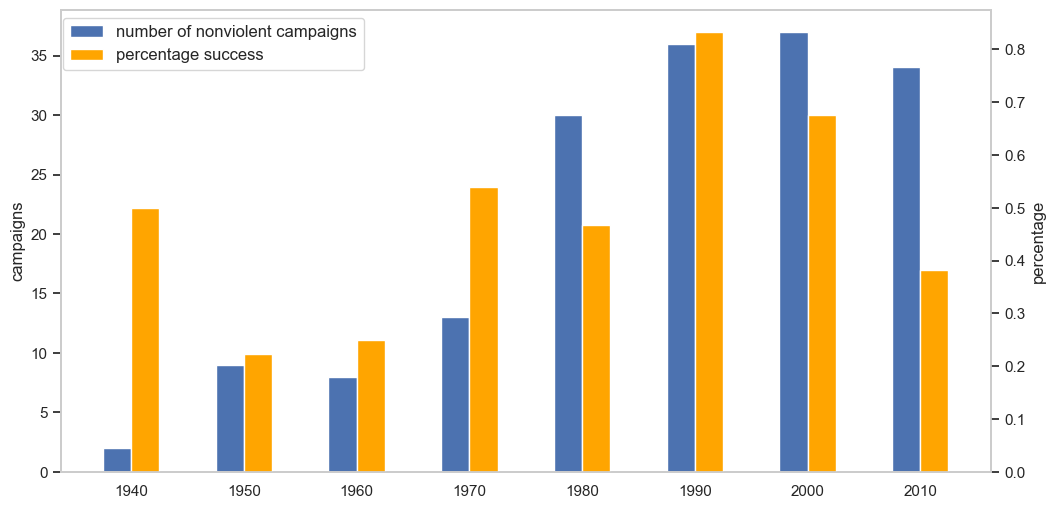

In [3]:
success_by_decade = df[(df['SUCCESS'] == 1) & (df['VIOL'] == 0)]
success_by_decade = success_by_decade.groupby('DECADE').size().reset_index(name='success_count')

total_by_decade = df[(df['VIOL'] == 0)]
total_by_decade = total_by_decade.groupby('DECADE').size().reset_index(name='total_count')

merged_df = pd.merge(total_by_decade, success_by_decade, on='DECADE', how='left').fillna(0)
merged_df['success_percentage'] = (merged_df['success_count'] / merged_df['total_count'])

width = 2.5  # the width of the bars
x = merged_df['DECADE']
y1 = merged_df['total_count']
y2 = merged_df['success_percentage']

fig = plt.figure(figsize=[12,6])
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

number = ax1.bar(x - width/2, y1, width, color='b', label='number of nonviolent campaigns')
ax1.grid(False)
ax1.set_ylabel('campaigns')
ax2.set_ylabel('percentage')
percentage = ax2.bar(x + width/2, y2, width, color='orange', label='percentage success')
ax2.grid(False)

fig.legend(bbox_to_anchor=(0.12, 0.88), loc='upper left', fontsize=12)

plt.show()

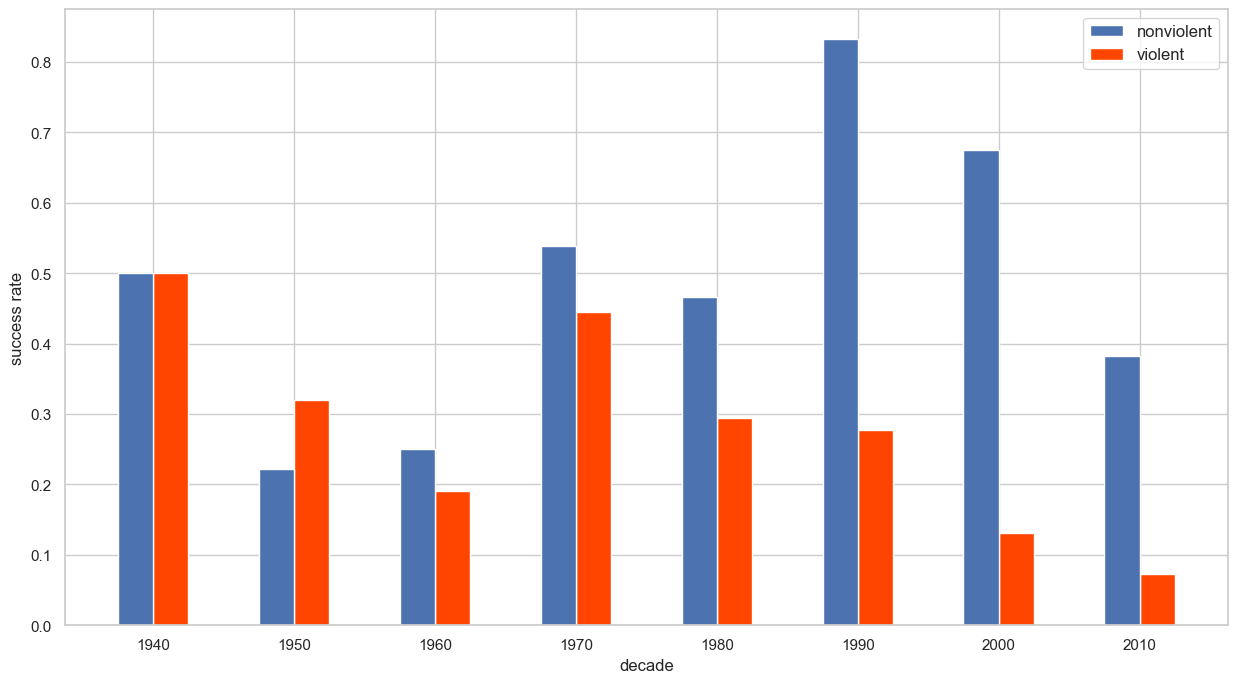

In [4]:
success_by_decade2 = df[(df['SUCCESS'] == 1) & (df['VIOL'] == 1)]
success_by_decade2 = success_by_decade2.groupby('DECADE').size().reset_index(name='success_count')

total_by_decade2 = df[(df['VIOL'] == 1)]
total_by_decade2 = total_by_decade2.groupby('DECADE').size().reset_index(name='total_count')

merged_df2 = pd.merge(total_by_decade2, success_by_decade2, on='DECADE', how='left').fillna(0)
merged_df2['success_percentage'] = (merged_df2['success_count'] / merged_df2['total_count'])

width = 2.5  # the width of the bars
fig = plt.figure(figsize=[15,8])
x = merged_df2['DECADE']
y1 = merged_df2['success_percentage']
y2 = merged_df['success_percentage']
ax = fig.add_subplot(111)
b2 = ax.bar(x + width/2, y1, width, color='orangered')
b1 = ax.bar(x - width/2, y2, width, color='b')
plt.xlabel('decade')
plt.ylabel('success rate')
ax.legend((b1[0], b2[0]), ('nonviolent', 'violent'), fontsize=12)

plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

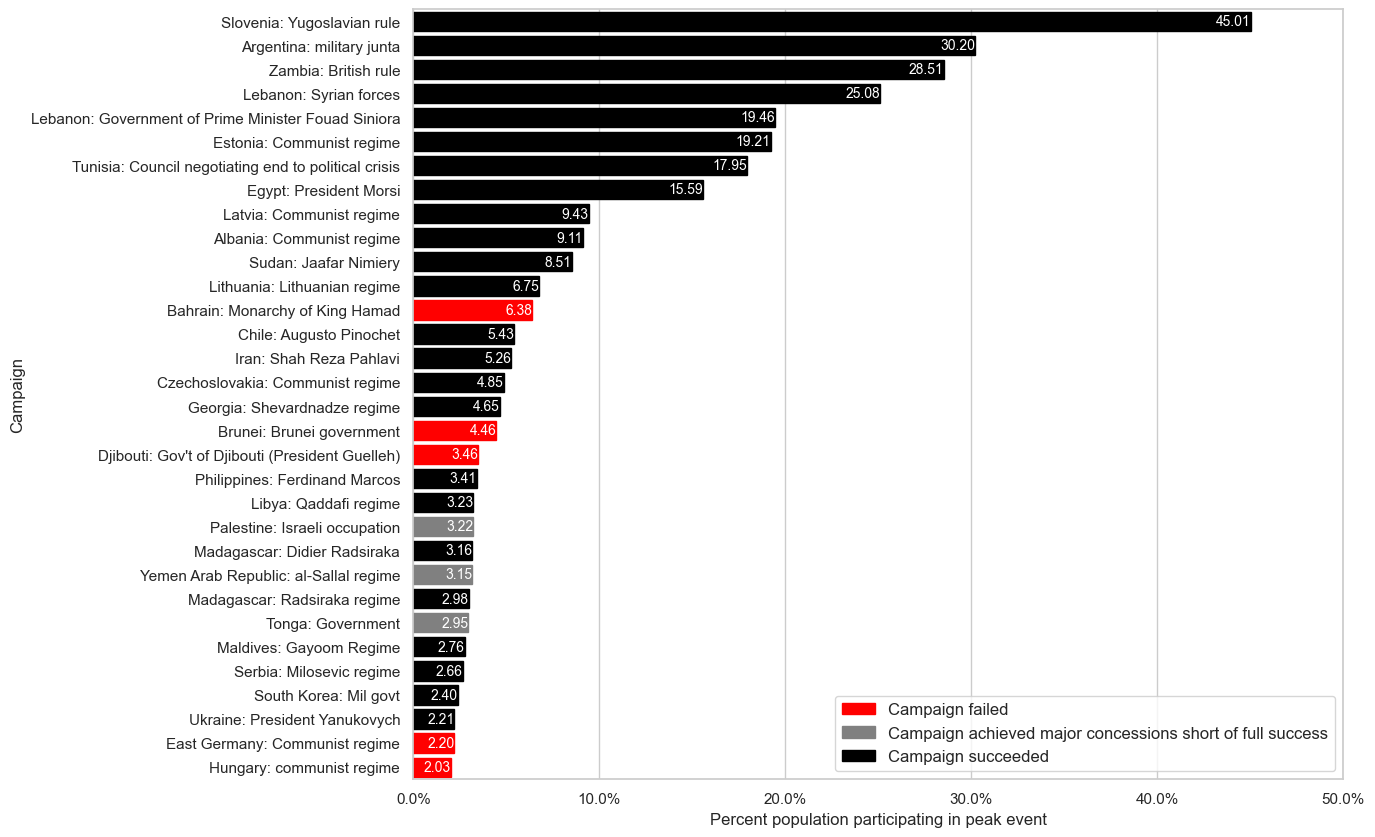

In [5]:
# Filter campaigns with participation percentage at least 2.0%
filtered_df = df[df['PERCENTAGE POPULAR PARTICIPATION'] >= 0.02]

# Sort the DataFrame by participation percentage in descending order
sorted_df = filtered_df.sort_values(by='PERCENTAGE POPULAR PARTICIPATION', ascending=False)
sorted_df['PERCENTAGE POPULAR PARTICIPATION'] = sorted_df['PERCENTAGE POPULAR PARTICIPATION'] * 100.0



plt.figure(figsize=(12, 10))

ax = sns.barplot(x=sorted_df['PERCENTAGE POPULAR PARTICIPATION'], y=sorted_df['LOCATION']+': '+sorted_df['TARGET'], data=sorted_df, color='black') # ,hue='SUCCESS', palette={0: 'red', 1: 'black'}

for bar, values,success,limited in zip(ax.patches, sorted_df['PERCENTAGE POPULAR PARTICIPATION'],sorted_df['SUCCESS'],sorted_df['LIMITED']):
    text_x = bar.get_width()
    text_y = bar.get_y() + bar.get_height() / 2
    text = '{:.2f}'.format(values)
    ax.text(text_x, text_y, text, ha='right', va='center', fontsize=10,color='white')
    if  limited == 1:
        bar.set_color('grey')
    elif success == 0:
        bar.set_color('red')
    else:
        bar.set_color('black')  

plt.xlabel('Percent population participating in peak event')
plt.ylabel('Campaign')
plt.xlim(0, 50)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.1f}%'.format))
# Create a custom legend
legend_labels = ['Campaign failed','Campaign achieved major concessions short of full success','Campaign succeeded']
legend_colors = ['red','grey','black']
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, linewidth=1) for color in legend_colors]
plt.legend(legend_elements, legend_labels, title='', loc='lower right', fontsize=12)

plt.show()

## 3. The Effect of Participation on the Probability of Campaign Success

Optimization terminated successfully.
         Current function value: 0.579175
         Iterations 5


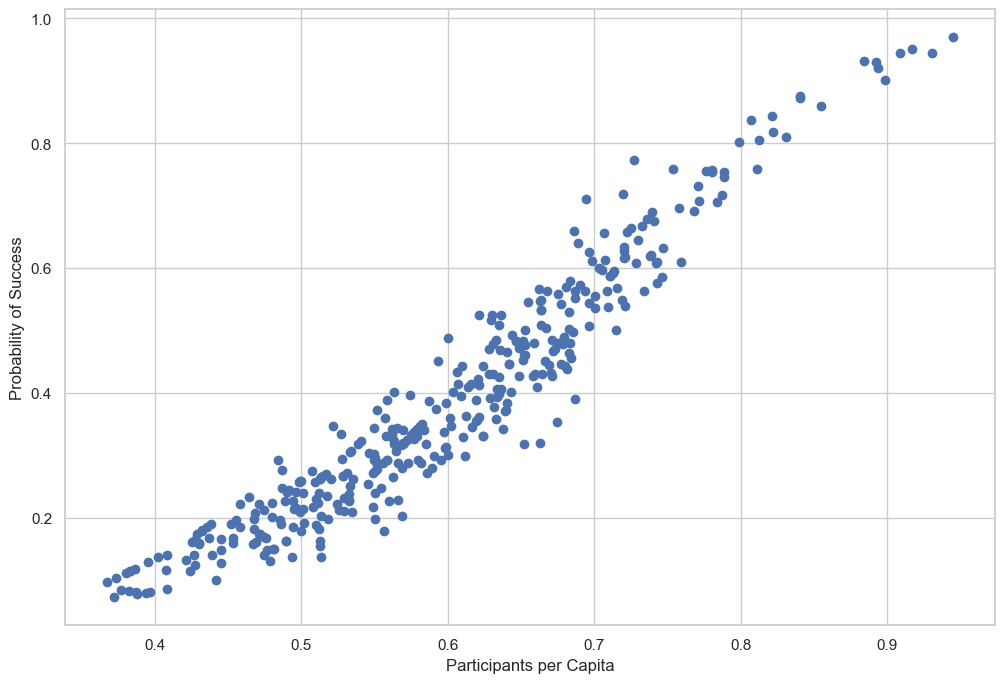

In [6]:
from statsmodels.formula.api import logit

scatter_df = df[['SUCCESS', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION']].copy()

scatter_df['POPULATION'] = scatter_df['PARTICIPATION'] / scatter_df['PERCENTAGE POPULAR PARTICIPATION'] # calculate population

scatter_df['LOGPOP'] = np.log(scatter_df['POPULATION']) # log population

scatter_df['LOGPART'] = np.log(scatter_df['PARTICIPATION']) # log participation number

scatter_df['MEMPC'] = scatter_df['LOGPART'] / scatter_df['LOGPOP'] # log of these two variables

#count_success = len(data[data['SUCCESS'] == 1])
#count_fail = len(data[data['SUCCESS'] == 0])

#perc_fail = count_fail/(count_fail+count_success)
#print("percentage of fail is", round(perc_fail*100,2))
#perc_success = count_success/(count_fail+count_success)
#print("percentage of success is", round(perc_success*100,2))
#data['SUCCESS'].value_counts()

#sns.countplot(x='SUCCESS',data=data, palette='hls',hue='SUCCESS')

# check for missing values

#missing_values = data.isnull().sum()
#display(missing_values)

# dropping the null values

scatter_df = scatter_df.dropna(how='any',axis=0)

#missing_values = data.isnull().sum()
#display(missing_values)

scatter_linear_df = scatter_df.copy()
#convert mempc to linear scale
scatter_linear_df['MEMPC'] = 10**scatter_df['MEMPC']

linear_success = logit("SUCCESS ~ MEMPC + LOGPOP", scatter_linear_df).fit()
linear_success.summary2()

X = scatter_df[['MEMPC', 'LOGPOP']]
y_prob = 1 / (1 + np.exp(-linear_success.fittedvalues))  # Using 'result' from the fitted logistic regression model
x = X.iloc[:, 0]

plt.figure(figsize=[12, 8])
plt.scatter(x, y_prob)
plt.ylabel('Probability of Success', fontsize=12)
plt.xlabel('Participants per Capita', fontsize=12)

plt.show()



Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


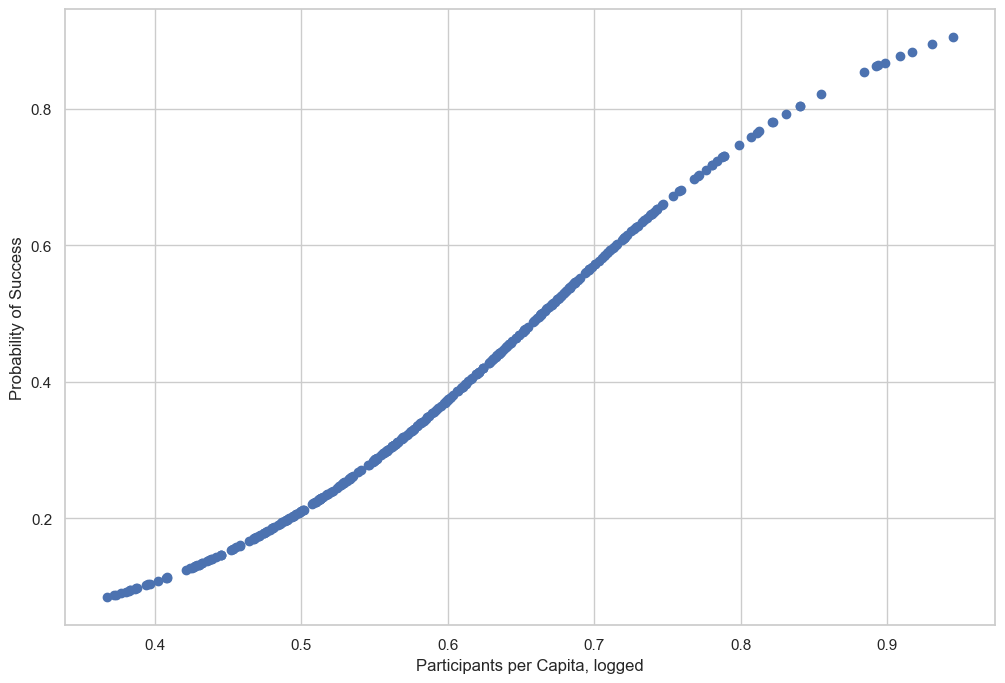

In [7]:
# Assuming 'linear_clear_data' is the DataFrame after cleaning and transforming variables

# Create a new logistic regression model with only MEMPC as a predictor
scatter_linear_df2 = scatter_df.copy()
scatter_linear_df2['MEMPC'] = scatter_df['MEMPC']  

linear_success_mempc = logit("SUCCESS ~ MEMPC", scatter_linear_df2).fit()

# Display the summary of the logistic regression model
linear_success_mempc.summary2()

# Predict the probabilities
X_mempc = scatter_linear_df2[['MEMPC']]
y_prob_mempc = 1 / (1 + np.exp(-linear_success_mempc.fittedvalues))

# Create the new scatter plot
plt.figure(figsize=[12, 8])
plt.scatter(X_mempc, y_prob_mempc)
plt.ylabel('Probability of Success', fontsize=12)
plt.xlabel('Participants per Capita, logged', fontsize=12)

plt.show()

## 4. The Level of Participation Tipping Point

In [8]:
import pandas as pd

new_df = df[['SUCCESS', 'PARTICIPATION', 'PERCENTAGE POPULAR PARTICIPATION', 'CAMPAIGN']].copy()

# Assuming df is your DataFrame
# You may need to adjust the column names based on your actual data
new_df['PERCENTAGE POPULAR PARTICIPATION'] = pd.to_numeric(new_df['PERCENTAGE POPULAR PARTICIPATION'], errors='coerce')
new_df['PERCENTAGE POPULAR PARTICIPATION'] = new_df['PERCENTAGE POPULAR PARTICIPATION'] * 100.0

# Define the bins for categorization
bins = [0.0001, 0.0035, 0.015, 0.06, 0.25, 1.0, 3.5, float('inf')]
labels = ['less than 0.0035%', '0.0035% - 0.015%', '0.015% - 0.06%', '0.06% - 0.25%', '0.25% - 1.0%', '1.0% - 3.5%', 'greater than 3.5%']

# Categorize the data based on the specified bins
new_df['Peak Popular Participation (%)'] = pd.cut(new_df['PERCENTAGE POPULAR PARTICIPATION'], bins=bins, labels=labels, right=False)

# Group by the Participation Category and calculate the observations and success rate
result = new_df.groupby('Peak Popular Participation (%)').agg({'SUCCESS': 'sum', 'CAMPAIGN': 'count'}).reset_index()

# Handle zero counts to prevent division by zero
result['Success Rate'] = result.apply(lambda row: (row['SUCCESS'] / row['CAMPAIGN']) * 100 if row['CAMPAIGN'] != 0 else 0, axis=1)

# Rename columns and format the output
result = result.rename(columns={'CAMPAIGN': 'Observations'})
result = result[['Peak Popular Participation (%)', 'Observations', 'Success Rate']]
result['Success Rate'] = result['Success Rate'].round(2).astype(str) + '%'

result = result.sort_values(by='Peak Popular Participation (%)', ascending=False).reset_index(drop=True)

# Display the result
display(result)

,Peak Popular Participation (%),Observations,Success Rate
0,greater than 3.5%,18,88.89%
1,1.0% - 3.5%,41,60.98%
2,0.25% - 1.0%,92,45.65%
3,0.06% - 0.25%,95,45.26%
4,0.015% - 0.06%,66,24.24%
5,0.0035% - 0.015%,44,9.09%
6,less than 0.0035%,24,4.17%


Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


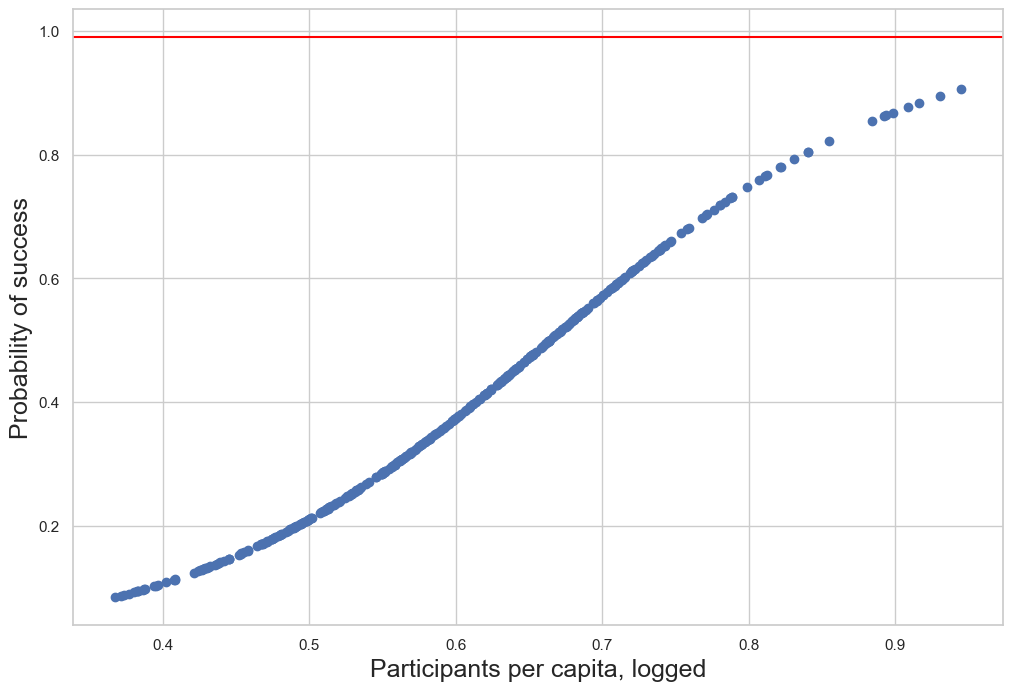

In [9]:
import matplotlib.pyplot as plt

scatter_linear_df2 = scatter_df.copy()
scatter_linear_df2['MEMPC'] = scatter_df['MEMPC']  

linear_success_mempc = logit("SUCCESS ~ MEMPC", scatter_linear_df2).fit()

# Display the summary of the logistic regression model
linear_success_mempc.summary2()

# Predict the probabilities
X = scatter_linear_df2[['MEMPC']]
y_prob = 1 / (1 + np.exp(-linear_success_mempc.fittedvalues))

plt.figure(figsize=[12,8])
plt.scatter(X,y_prob)
plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)
plt.axhline(y=0.99, color='red')



Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6


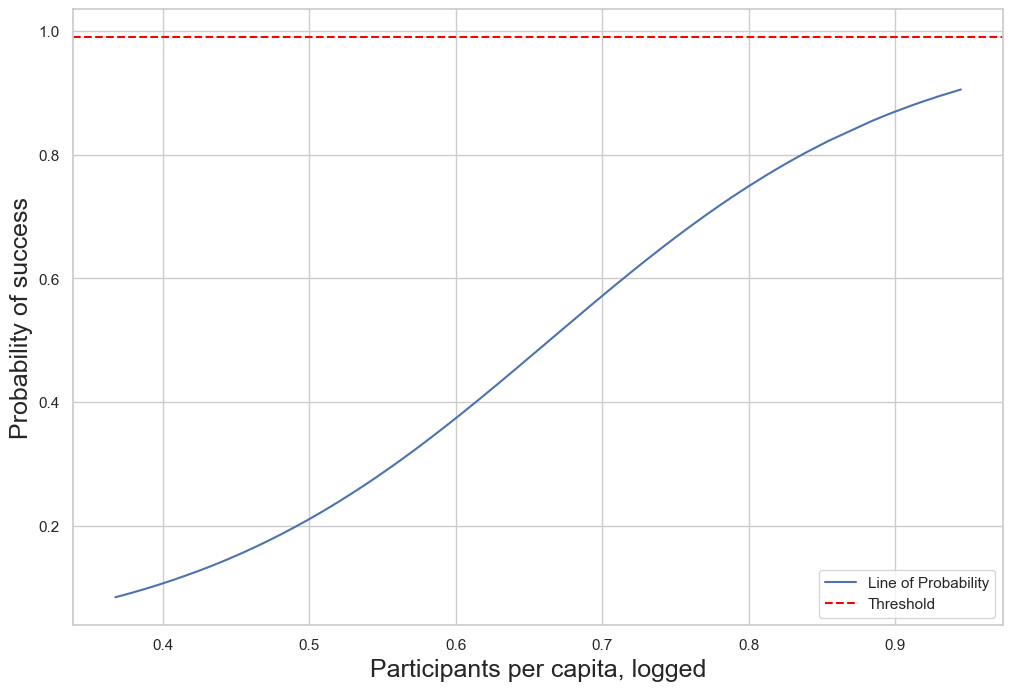

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Assuming you have already defined scatter_df and logit function

scatter_linear_df2 = scatter_df.copy()
scatter_linear_df2['MEMPC'] = scatter_df['MEMPC']

linear_success_mempc = logit("SUCCESS ~ MEMPC", scatter_linear_df2).fit()

# Predict the probabilities
X = scatter_linear_df2[['MEMPC']]
y_prob = 1 / (1 + np.exp(-linear_success_mempc.fittedvalues))

# Combine X, y_prob into a DataFrame for sorting
sorted_data = pd.DataFrame({'X': X['MEMPC'], 'y_prob': y_prob})
sorted_data = sorted_data.sort_values(by='X')

plt.figure(figsize=[12, 8])

# Use sns.lineplot to plot the line
sns.lineplot(x=sorted_data['X'], y=sorted_data['y_prob'], label='Line of Probability')

plt.ylabel('Probability of success', fontsize=18)
plt.xlabel('Participants per capita, logged', fontsize=18)
plt.axhline(y=0.99, color='red', linestyle='--', label='Threshold')

plt.legend()
plt.show()



## 5. Nonviolent Resistance and Target Regime Type

In [11]:
import pandas as pd

p5_df = pd.read_excel('p5v2018.xls')

# Convert 'EndYear' to integer for matching
df['EYEAR'] = df['EYEAR']
p5_df['year'] = p5_df['year']

# Merge based on 'EndYear' and 'Country'
merged_df = pd.merge(df, p5_df, how='inner', left_on=['EYEAR', 'LOCATION'], right_on=['year', 'country'])

# Drop the duplicate 'Year' column if needed
merged_df = merged_df.drop(columns=['year'])

merged_df['POPULATION'] = merged_df['PARTICIPATION'] / merged_df['PERCENTAGE POPULAR PARTICIPATION'] # calculate population

merged_df['LOGPOP'] = np.log(merged_df['POPULATION']) # log population

merged_df['LOGPART'] = np.log(merged_df['PARTICIPATION']) # log participation number

filtered_df = merged_df[['SUCCESS','NONVIOL','polity','LOGPART','LOGPOP']]

#percent_missing = filtered_df.isnull().sum() * 100 / len(filtered_df)
#percent_missing

filtered_df = filtered_df.dropna(how='any',axis=0)

#percent_missing = filtered_df.isnull().sum() * 100 / len(filtered_df)
#percent_missing

log_df = logit("SUCCESS ~ NONVIOL + polity + LOGPART + LOGPOP",filtered_df).fit()
log_df.summary2()



Optimization terminated successfully.
         Current function value: 0.542765
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: SUCCESS          Pseudo R-squared: 0.194     
Date:               2023-12-03 08:01 AIC:              341.0868  
No. Observations:   305              BIC:              359.6883  
Df Model:           4                Log-Likelihood:   -165.54   
Df Residuals:       300              LL-Null:          -205.27   
Converged:          1.0000           LLR p-value:      2.2774e-16
No. Iterations:     6.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept      1.2494    1.5079   0.8286  0.4073  -1.7060   4.2049
NONVIOL        0.9251    0.2868   3.2253  0.0013   0.3629   1.4873
polity        -0.0094    0.0040  -2.3393  0.0193  -0.0173  -0.0015
LOGPART        0.4256    0.0873   4.8738  0.0000   0.2545   0.5968
LOGPOP        -0.3941    0.0988  -3.9895  0.0001  -0.5877  -0.2005
=================================================================

"""